In [1]:
%load_ext autoreload
%load_ext autotime

time: 260 µs (started: 2023-11-29 15:04:04 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

time: 766 ms (started: 2023-11-29 15:04:04 -08:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 2.1.2
dask 2023.9.3
numpy 1.24.3
time: 941 ms (started: 2023-11-29 15:04:05 -08:00)


In [4]:
trace_path = '/p/vast1/iopp/recorder_app_logs/flash_sedov3d_hdf5/_parquet'

time: 687 µs (started: 2023-11-29 15:04:18 -08:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-flash'

analyzer = RecorderAnalyzer(
    checkpoint=False,
    checkpoint_dir=f"{trace_path}/_checkpoints1129",
    cluster_config=cluster_config,
    working_dir='.wisio/recorder/flash',
    debug=True,
)

analyzer

[INFO] [15:04:40] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:90]
[DEBUG] [15:04:40] Using selector: EpollSelector [/collab/usr/gapps/python/build/spack-toss4.1/var/spack/environments/python/._view/75prb56irmif5ejtirjthpx6kq3gqo52/lib/python3.9/asyncio/selector_events.py:54]


time: 3.72 s (started: 2023-11-29 15:04:39 -08:00)


In [6]:
analyzer.cluster_manager.client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44563/status,
Dashboard: http://127.0.0.1:44563/status,Workers: 8
Total threads: 48,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45593,Workers: 8
Dashboard: http://127.0.0.1:44563/status,Total threads: 48
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:42885,Total threads: 6
Dashboard: http://127.0.0.1:43373/status,Memory: 0 B
Nanny: tcp://127.0.0.1:44733,


time: 58.2 ms (started: 2023-11-29 15:04:46 -08:00)


In [7]:
%autoreload 2

res = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    view_types=['proc_name'],
)

[DEBUG] [15:04:55] Read traces (0.20644512865692377) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:05] Compute high-level metrics (10.32073037698865) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:06] Compute main view (1.1376980636268854) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:06] Compute metric boundaries (0.018901128321886063) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:06] Compute views (0.17059240024536848) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:07] Compute logical views (0.9728447245433927) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:08] Evaluate I/O accesses (0.31781775690615177) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:09] Detect I/O characteristics (1.3872857317328453) [/g/g91/izzet/projects/wisio/not

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  I/O Time        1.99 seconds                                                                                   │
│                  ├── Read - 0.00 seconds (0.00%)                                                                │
│                  ├── Write - 0.31 seconds (15.65%)                                                              │
│                  └── Metadata - 1.71 seconds (86.02%)                                                           │
│  I/O Ops         2,478,922 ops                                                                                  │
│                  ├── Read - 4 ops (0.00%)                                                                       │
│                  ├── Write - 1,769 ops (0.07%)                                                                  │
│                  └── Metadata - 2,477,149 ops (99.93%)                                                          │
│  I/O Size        4.34 GB                                                                                        │
│                  ├── Read - 0.00 GB (0.00%)                                                                     │
│                  └── Write - 0.27 GB (6.24%)                                                                    │
│  Read Xfer       4 KB-16 KB - 1 ops                                                                             │
│                  └── 4-16 KB - 1 ops (100.00%)                                                                  │
│  Write Xfer      4 KB-1 MB - 29 ops                                                                             │
│                  ├── <4 KB - 28 ops (96.55%)                                                                    │
│                  └── 256 KB-1 MB - 1 ops (3.45%)                                                                │
│  Node(s)         1 node(s)                                                                                      │
│                  └── localhost - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops (100.00%)     │
│  App(s)          1 app(s)                                                                                       │
│                  └── app1 - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops (100.00%)          │
│  Files           0 files                                                                                        │
│                  ├── Shared: N/A                                                                                │
│                  └── FPP: N/A                                                                                   │
│  Access Pattern  100.00% Sequential - 0.00% Random                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  excessive_metadata_access                                                                                      │
│  ├── proc_name                                                                                                  │
│  │   ├── 1 process has an I/O time of 1.55 seconds which is 78.04% of overall I/O time of the workload.         │
│  │   ├── 1 process has an I/O time of 1.26 seconds which is 63.51% of overall I/O time of the workload.         │
│  │   ├── 1 process has an I/O time of 1.36 seconds which is 68.38% of overall I/O time of the workload.         │
│  │   ├── 1 process has an I/O time of 1.27 seconds which is 63.87% of overall I/O time of the workload.         │
│  │   ├── 1 process has an I/O time of 1.25 seconds which is 62.92% of overall I/O time of the workload.         │
│  │   ├── 1 process has an I/O time of 1.52 seconds whi

time: 17.5 s (started: 2023-11-29 15:04:55 -08:00)


In [8]:
%autoreload 2

res = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[DEBUG] [15:05:47] Read traces (0.1248984606936574) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:50] Compute high-level metrics (3.602119759656489) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:51] Compute main view (1.2671398483216763) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:51] Compute metric boundaries (0.02269969042390585) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:55] Compute views (3.700720460154116) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:57] Compute logical views (1.4207702074199915) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:05:58] Evaluate I/O accesses (1.5981993731111288) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [15:06:01] Detect I/O characteristics (2.657663389109075) [/g/g91/izzet/projects/wisio/notebooks

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  I/O Time        1.99 seconds                                                                                   │
│                  ├── Read - 0.00 seconds (0.00%)                                                                │
│                  ├── Write - 0.31 seconds (15.65%)                                                              │
│                  └── Metadata - 1.71 seconds (86.02%)                                                           │
│  I/O Ops         2,478,922 ops                                                                                  │
│                  ├── Read - 4 ops (0.00%)                                                                       │
│                  ├── Write - 1,769 ops (0.07%)                                                                  │
│                  └── Metadata - 2,477,149 ops (99.93%)                                                          │
│  I/O Size        4.34 GB                                                                                        │
│                  ├── Read - 0.00 GB (0.00%)                                                                     │
│                  └── Write - 0.27 GB (6.24%)                                                                    │
│  Read Xfer       4 KB-16 KB - 2 ops                                                                             │
│                  ├── <4 KB - 1 ops (50.00%)                                                                     │
│                  └── 4-16 KB - 1 ops (50.00%)                                                                   │
│  Write Xfer      4 KB-1 MB - 427 ops                                                                            │
│                  ├── <4 KB - 381 ops (89.23%)                                                                   │
│                  ├── 4-16 KB - 7 ops (1.64%)                                                                    │
│                  ├── 16-64 KB - 10 ops (2.34%)                                                                  │
│                  └── 256 KB-1 MB - 29 ops (6.79%)                                                               │
│  Node(s)         1 node(s)                                                                                      │
│                  └── localhost - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops (100.00%)     │
│  App(s)          1 app(s)                                                                                       │
│                  └── app1 - 1.99 s (100.00%) - 0.00/0.27 GB R/W (0.00/6.24%) - 2,478,922 ops (100.00%)          │
│  Files           1581 files                                                                                     │
│                  ├── Shared: 274 files (17.33%)                                                                 │
│                  └── FPP: 1307 files (82.67%)                                                                   │
│  Access Pattern  100.00% Sequential - 0.00% Random                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  excessive_metadata_access                                                                                      │
│  ├── file_name                                                                                                  │
│  │   └── 1024 processes access 1 file within 6 time periods and have an I/O time of 1.52 seconds which is       │
│  │       76.49% of overall I/O time of the workload.                                                            │
│  ├── proc_name                                        

time: 28.8 s (started: 2023-11-29 15:05:46 -08:00)


In [54]:
%autoreload 2

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=result.bottlenecks, characteristics=characteristics, threshold=0.01)
processed_bottlenecks

Delayed('_process_bott_metadata_access-0b603f6e-8154-40bf-8dc5-d7a3d1a52387')
here
(('duration', <Rule.BOTT_METADATA_ACCESS: 207>, ('time_range',), {5: RuleResult(data_dict={'llc': {'duration_sum': 0.0847667995840311, 'index_count': 3131, 'size_min': 0, 'size_max': 18036736, 'size_sum': 107371752, 'read_time': 0.0, 'write_time': 0.011060999908295344, 'metadata_time': 0.0847667995840311, 'read_size': 0, 'write_size': 12588296, 'metadata_size': 94783456, 'read_count': 0, 'write_count': 34, 'metadata_count': 3097, 'read_min': 0, 'read_max': 0, 'write_min': 1384, 'write_max': 1050968, 'metadata_min': 21739176, 'metadata_max': 55814824, 'data_count': 34, 'data_size': 12588296, 'data_time': 0.011060999908295344, 'sequential_time': 0.011060999908295344, 'random_time': 0.0, 'sequential_size': 12588296, 'random_size': 0, 'sequential_count': 34, 'random_count': 0, 'close_time': 0.0, 'open_time': 0.0, 'seek_time': 1.3699999897198722e-05, 'stat_time': 0.0, 'close_count': 0, 'open_count': 0, 'seek_

{'duration': {('time_range',): {<Rule.BOTT_METADATA_ACCESS: 207>: {5: RuleResult(data_dict={'llc': {'duration_sum': 0.0847667995840311, 'index_count': 3131, 'size_min': 0, 'size_max': 18036736, 'size_sum': 107371752, 'read_time': 0.0, 'write_time': 0.011060999908295344, 'metadata_time': 0.0847667995840311, 'read_size': 0, 'write_size': 12588296, 'metadata_size': 94783456, 'read_count': 0, 'write_count': 34, 'metadata_count': 3097, 'read_min': 0, 'read_max': 0, 'write_min': 1384, 'write_max': 1050968, 'metadata_min': 21739176, 'metadata_max': 55814824, 'data_count': 34, 'data_size': 12588296, 'data_time': 0.011060999908295344, 'sequential_time': 0.011060999908295344, 'random_time': 0.0, 'sequential_size': 12588296, 'random_size': 0, 'sequential_count': 34, 'random_count': 0, 'close_time': 0.0, 'open_time': 0.0, 'seek_time': 1.3699999897198722e-05, 'stat_time': 0.0, 'close_count': 0, 'open_count': 0, 'seek_count': 22, 'stat_count': 0, 'bw': 1266672241.100245, 'iops': 401.10043279733696, 

time: 3.94 s (started: 2023-09-26 22:44:49 -07:00)


In [63]:
for rule in processed_bottlenecks['duration'][('time_range',)]:
    rule_results = processed_bottlenecks['duration'][('time_range',)][rule]
    for time_range in rule_results:
        rule_result = rule_results[time_range]
        print(rule, rule_result.description)

Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 2 file(s) during the 5th second(s) and has an I/O time of 0.08 seconds which is 4.26% of overall I/O time of the workload.
Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 2 file(s) during the 6th second(s) and has an I/O time of 0.08 seconds which is 4.25% of overall I/O time of the workload.
Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 259 file(s) during the 7th second(s) and has an I/O time of 0.08 seconds which is 4.08% of overall I/O time of the workload.
Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 2 file(s) during the 15th second(s) and has an I/O time of 0.03 seconds which is 1.32% of overall I/O time of the workload.
Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 2 file(s) during the 17th second(s) and has an I/O time of 0.09 seconds which is 4.38% of overall I/O time of the workload.
Rule.BOTT_METADATA_ACCESS 1024 process(es) access(es) 2 file(s) during the 18th second(s) and has an I/O time o

(<matplotlib.axes._subplots.AxesSubplot at 0x15549b7da9a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15549b7da9a0>)

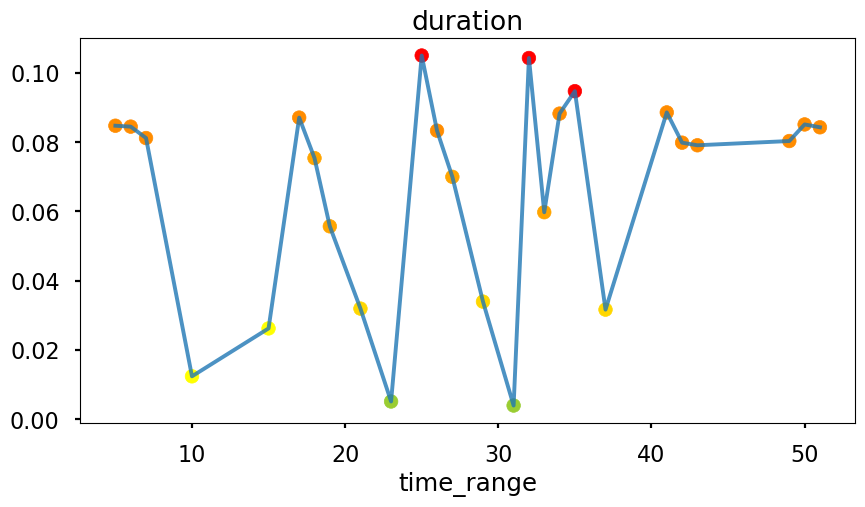

time: 1.15 s (started: 2023-09-26 22:56:00 -07:00)


In [68]:
result.plot.bottleneck_timeline('duration')